# Pandas: Python Data Analysis Library [[pandas.pydata.org](https://pandas.pydata.org/)]
---
* 데이터 분석(탐색,조작 등)을 위한 Python 기반의 오픈 소스 라이브러리
* Python의 Excel이라고 부름: Excel 내 대부분의 기능 포함
* NumPy의 객체가 Ndarray, array 라면, Pandas의 기본 객체는 Series, DataFrame 임
  * DataFrame은 여러 개의 Series로 구성됨
  * Ndarray와 DataFrame 서로 호환됨

---
# 학습목표
* Pandas에서 제공하는 Series, DataFrame 객체가 무엇인지 살펴본다.
* Series 및 DataFrame 객체를 가지고 적용할 수 있는 여러 가지 함수를 살펴본다.

In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.DataFrame()

# Introduction to pandas Data Structures

## Series
---
* 1-dimensional array-like object
* Ndarray와 유사하나 index가 자동으로 설정됨
  * index 직접 설정 가능
  * index 미지정 시 array 길이만큼 자동 생성
  

In [3]:
obj  = pd.Series([1,2,3,4])
display(obj)
print(f"\nobj.array:{obj.array}")
print(f"\nobj.index:\n{obj.index}")

,0
0,1
1,2
2,3
3,4



obj.array:<NumpyExtensionArray>
[np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Length: 4, dtype: int64

obj.index:
RangeIndex(start=0, stop=4, step=1)


In [4]:
obj2 = pd.Series([4, 7, -5, 3], index=["d", "b", "a", "c"])
display(obj2)
print(f"\nobj2.index:\n{obj2.index}")

,0
d,4
b,7
a,-5
c,3



obj2.index:
Index(['d', 'b', 'a', 'c'], dtype='object')


In [5]:
# index를 이용한 indexing
obj2["a"],obj2[['a','b','c']] # 두 개 이상 indexing 시 list로 입력

(np.int64(-5),
 a   -5
 b    7
 c    3
 dtype: int64)

In [7]:
obj2['a','b']

KeyError: 'key of type tuple not found and not a MultiIndex'

In [8]:
# numpy와 유사한 연산/처리 방식
# 단, Series 내 원소가 숫자여야 함
display(obj2>0)
display(obj2[obj2 > 0])
display(obj2*2)
print("\nnp.mean(obj2):{}".format(np.mean(obj2)))

,0
d,True
b,True
a,False
c,True


,0
d,4
b,7
c,3


,0
d,8
b,14
a,-10
c,6



np.mean(obj2):2.25


### Dictionary와 Series
* Dictionary의 key = Series의 index
* Dictionary의 value = Series의 array

In [9]:
# dictionary to Series
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
obj3 = pd.Series(sdata)
display(obj3)

# Series to dictionary
reversed = obj3.to_dict()
display(reversed)


,0
Ohio,35000
Texas,71000
Oregon,16000
Utah,5000


{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [10]:
# 기존의 dictionary와 지정하고자 하는 index 혼용
# 지정하고자 하는 index 내 원소 중(California) 기존의 dictionary의 key에 없으면 해당 value는 NaN(결측치,Not A Number)가 됨
# dictionary의 key 중 일부가(Utah) 지정하고자 하는 index에 없으면 해당 key(Utah)와 value(5000)는 삭제됨
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
states = ["California", "Ohio", "Oregon", "Texas"]
obj4 = pd.Series(sdata, index=states)
print('obj3:')
display(obj3)

print('\nobj4:')
display(obj4)

# 결측치 확인
print()
display(pd.isna(obj4)) # value가 결측치면 True
print()
display(pd.notna(obj4)) # value가 결측치면 False

obj3:


,0
Ohio,35000
Texas,71000
Oregon,16000
Utah,5000



obj4:


,0
California,NaN
Ohio,35000.0
Oregon,16000.0
Texas,71000.0


,0
California,True
Ohio,False
Oregon,False
Texas,False


,0
California,False
Ohio,True
Oregon,True
Texas,True


In [11]:
# Series 및 Series의 index 이름 지정

obj3.name = "Population" # 추후 DataFrame으로 합쳐질 시 column의 이름으로 됨
obj3.index.name = "State"
obj3

,Population
State,
Ohio,35000
Texas,71000
Oregon,16000
Utah,5000


## DataFrame
---
* A DataFrame represents a rectangular table of data and contains an ordered, named collection of columns, each of which can be a different value type (numeric, string, Boolean, etc.)

*

### Introduction

In [12]:
# dictionary로 DataFrame 생성하기
# 이때, value의 길이(len)가 모두 같아야 함
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df = pd.DataFrame(data)
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [13]:
# dictionary에 없는 key를 columns에 추가 시 결측치로 처리됨
df2 = pd.DataFrame(data, columns=["year", "state", "pop", "debt"])
df2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


In [14]:
# column 이름을 통해 따로 열 추출 가능: Series 형태로 출력됨
type(df2["year"]),df2["year"], df2.year # column 이름에 공백이 없을 시 온점으로 출력 가능

(pandas.core.series.Series,
 0    2000
 1    2001
 2    2002
 3    2001
 4    2002
 5    2003
 Name: year, dtype: int64,
 0    2000
 1    2001
 2    2002
 3    2001
 4    2002
 5    2003
 Name: year, dtype: int64)

In [15]:
# DataFrame에 없는 열 추가/생성: 새로운 열 이름과 함께 value 입력
# 1) 상수로 채우기
df2["debt"] = np.arange(6) ; display(df2)


,year,state,pop,debt
0,2000,Ohio,1.5,0
1,2001,Ohio,1.7,1
2,2002,Ohio,3.6,2
3,2001,Nevada,2.4,3
4,2002,Nevada,2.9,4
5,2003,Nevada,3.2,5


In [16]:
# 2) 길이가 맞는 array
df2["debt"] = np.arange(6); display(df2)
display(df2["state"] == "Ohio")
df2["eastern"] = df2["state"] == "Ohio" ; display(df2)

,year,state,pop,debt
0,2000,Ohio,1.5,0
1,2001,Ohio,1.7,1
2,2002,Ohio,3.6,2
3,2001,Nevada,2.4,3
4,2002,Nevada,2.9,4
5,2003,Nevada,3.2,5


,state
0,True
1,True
2,True
3,False
4,False
5,False


,year,state,pop,debt,eastern
0,2000,Ohio,1.5,0,True
1,2001,Ohio,1.7,1,True
2,2002,Ohio,3.6,2,True
3,2001,Nevada,2.4,3,False
4,2002,Nevada,2.9,4,False
5,2003,Nevada,3.2,5,False


In [17]:
# DataFrame에 없는 열 제거: del
del df2["eastern"]
display(df2)

,year,state,pop,debt
0,2000,Ohio,1.5,0
1,2001,Ohio,1.7,1
2,2002,Ohio,3.6,2
3,2001,Nevada,2.4,3
4,2002,Nevada,2.9,4
5,2003,Nevada,3.2,5


### Nested dictionary로 DataFrame 만들기
* Nested dictionary: Value가 dictionary인 dictionary / 이중 dictionary
* outer dictionary의 key = columns
* inner dictionary의 key = index

In [18]:
populations = {"Ohio": {2000: 1.5, 2001: 1.7, 2002: 3.6},
               "Nevada": {2001: 2.4, 2002: 2.9}}
df3 = pd.DataFrame(populations)
df3

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


In [19]:
# 행/열의 위치 바꿈
df3_t = df3.T
display(df3_t)
display(df3_t.index,df3_t.columns)

,2000,2001,2002
Ohio,1.5,1.7,3.6
Nevada,NaN,2.4,2.9


Index(['Ohio', 'Nevada'], dtype='object')

Index([2000, 2001, 2002], dtype='int64')

### Numpy array로 변환

In [20]:
df3.to_numpy()

array([[1.5, nan],
       [1.7, 2.4],
       [3.6, 2.9]])

# DataFrame Dropping, Indexing, Selection, Filtering

## Dropping: 특정 행/열 제거
---
`df.drop()`
* 특정 index의 행이나 특정 이름의 열 제거시 사용

In [21]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
display(data)

print(f"\n행 제거:[Colorado, Ohio]")
display(data.drop(index=["Colorado", "Ohio"]))
display(data.drop(["Colorado","Ohio"], axis = 0))

print(f"\n열 제거:[two]")
display(data.drop(columns=["two"]))
display(data.drop(["two"], axis = 1))
display(data)

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15



행 제거:[Colorado, Ohio]


,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15



열 제거:[two]


,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


## Indexing


In [22]:
# column 이름 직접 활용
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])

data["two"], data[["three","one"]]

(Ohio         1
 Colorado     5
 Utah         9
 New York    13
 Name: two, dtype: int64,
           three  one
 Ohio          2    0
 Colorado      6    4
 Utah         10    8
 New York     14   12)

In [23]:
# slicing 이용: 행의 순서(기준)가 됨
data[1:3]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11


In [24]:
# boolean으로 indexing: 행 기준
condition = data["three"]>5
display(condition)
display(data[condition])

,three
Ohio,False
Colorado,True
Utah,True
New York,True


,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [25]:
# 모든 원소를 대상으로 boolean으로 indexing
condition = data<5 # 원소 중 5보다 작은 원소의 위치를 True/False로 반환
display(condition)
print()

display(data[condition]) # condition에 해당하는 원소 값들은 그대로 보여주고, 나머지는 결측치 처리 됨

# 결측치 처리
data[~condition] = 0 # 결측치로 처리되는 애들을 다 0으로 설정하겠다
display(data)


,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


,one,two,three,four
Ohio,0.0,1.0,2.0,3.0
Colorado,4.0,NaN,NaN,NaN
Utah,NaN,NaN,NaN,NaN
New York,NaN,NaN,NaN,NaN


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,0,0,0
Utah,0,0,0,0
New York,0,0,0,0


### Selection on DataFrame with loc and iloc
---
`df.loc()/df.iloc()`

* loc: location의 약자로 index나 column의 이름이 문자형일 때 활용
* iloc: loc과 동일한 역할을 하나 정수로 index/column의 위치를 나타냄

In [26]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
display(data)

# comma(,)를 기준으로 행과 열의 index/
# df.loc[,]
print(f"\ntype(data.loc['Ohio']):{type(data.loc['Ohio'])}")
display(data.loc["Ohio"]) # 한 행/열 일 때는 list로 입력하지 않아도 됨
display(data.loc[["Colorado", "New York"]]) # 다중일 때는 list로 입력 필요
display(data.loc[["Colorado","Ohio"], ["two", "three"]])
display(data[['two','three']])

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15



type(data.loc['Ohio']):<class 'pandas.core.series.Series'>


,Ohio
one,0
two,1
three,2
four,3


,one,two,three,four
Colorado,4,5,6,7
New York,12,13,14,15


,two,three
Colorado,5,6
Ohio,1,2


,two,three
Ohio,1,2
Colorado,5,6
Utah,9,10
New York,13,14


In [27]:
# Boolean arrays can be used with loc but not iloc
data.loc[data.three >= 6]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [29]:
# iloc 이용시 모두 정수 활용해야 함
display(data.iloc[2])
display(data.iloc[[2, 1]])
display(data.iloc[[1,2], [3, 0, 1]])
display(data.iloc[:, :3])

,Utah
one,8
two,9
three,10
four,11


,one,two,three,four
Utah,8,9,10,11
Colorado,4,5,6,7


,four,one,two
Colorado,7,4,5
Utah,11,8,9


,one,two,three
Ohio,0,1,2
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


# Arithmetic and Data Alignment
* Index와 column 이용하여 수치형 데이터 연산

In [30]:
# 공통 index의 수치형 데이터에 연산 적용: a,c,e
# 비공통 index에 대한 데이터는 결측치로 처리: d,f,g

s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=["a", "c", "d", "e"])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=["a", "c", "e", "f", "g"])
display(s1)
print()
display(s2)
print()
display(s1+s2)



,0
a,7.3
c,-2.5
d,3.4
e,1.5


,0
a,-2.1
c,3.6
e,-1.5
f,4.0
g,3.1


,0
a,5.2
c,1.1
d,NaN
e,0.0
f,NaN
g,NaN


In [31]:
# DataFrame의 경우 column과 index를 동시 고려
# 공통의 column과 index에 해당하는 원소 간의 연산 진행: (Ohio,b), (Ohio,d),(Texas,b),(Texas,d)
# 나머지 원소: 결측치

df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list("bcd"),index=["Ohio", "Texas", "Colorado"])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list("bde"),index=["Utah", "Ohio", "Texas", "Oregon"])

display(df1,df2)
display(df1+df2)

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [32]:
# index 또는 column이 겹치는 원소에 대한 결측치 처리
# ex) df1 입장에서 (Ohio,e)는 존재하지 않음 → (ohio,e) = 0으로 설정 후 연산 진행
# index와 column이 하나도 겹치지 않는 원소: (Colorado,e),(Utah,c),(Oregon,c)
display(df1+df2)
display(df1.add(df2,fill_value=0))
display(df2.add(df1,fill_value =0))

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


,b,c,d,e
Colorado,6.0,7.0,8.0,NaN
Ohio,3.0,1.0,6.0,5.0
Oregon,9.0,NaN,10.0,11.0
Texas,9.0,4.0,12.0,8.0
Utah,0.0,NaN,1.0,2.0


,b,c,d,e
Colorado,6.0,7.0,8.0,NaN
Ohio,3.0,1.0,6.0,5.0
Oregon,9.0,NaN,10.0,11.0
Texas,9.0,4.0,12.0,8.0
Utah,0.0,NaN,1.0,2.0


In [33]:
"".join(list("bde"))

'bde'

In [34]:
# numpy 계산과 같이 broadcasting 적용됨: 단, index와 column을 고려하여 진행
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list("bde"),
                     index=["Utah", "Ohio", "Texas", "Oregon"])
series = frame.iloc[0]

display(frame,series)
display(frame-series)

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


,Utah
b,0.0
d,1.0
e,2.0


,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [35]:
# 만약, column이 맞지 않는 경우, 공통된 원소 제외 나머지 원소는 결측치 처리
series2 = pd.Series(np.arange(3), index=["b", "e", "f"])
display(series2)
display(frame - series2)

,0
b,0
e,1
f,2


,b,d,e,f
Utah,0.0,NaN,1.0,NaN
Ohio,3.0,NaN,4.0,NaN
Texas,6.0,NaN,7.0,NaN
Oregon,9.0,NaN,10.0,NaN


# Function Application and Mapping

* DataFrame의 행/열 별 또는 전체 원소에 특정 함수를 한 번에 적용하고 싶은 경우
* 함수 적용의 대상이 Series 임
* Numpy function, Python 내장함수, custom 함수 등 적용 가능
* `df.apply()` : 행/열 전체를 기준으로 특정 함수 적용 시
* `df.applymap()` : 각 원소마다 특정 함수 적용 시

In [36]:
seed = 123
np.random.seed(seed)
frame = pd.DataFrame(np.random.standard_normal((4, 3)), # np.random.randn과 동일
                     columns=list("bde"),
                     index=["Utah", "Ohio", "Texas", "Oregon"])
display(frame)

,b,d,e
Utah,-1.085631,0.997345,0.282978
Ohio,-1.506295,-0.578600,1.651437
Texas,-2.426679,-0.428913,1.265936
Oregon,-0.866740,-0.678886,-0.094709


In [37]:
# numpy 함수 적용
display(np.abs(frame)) # 각 원소의 절대값

,b,d,e
Utah,1.085631,0.997345,0.282978
Ohio,1.506295,0.578600,1.651437
Texas,2.426679,0.428913,1.265936
Oregon,0.866740,0.678886,0.094709


In [38]:
# df.apply() 이용

# x는 각 열/행을 의미하게 됨

def f1(x): #
  return x.max() - x.min()

# 각 열마다 함수 적용
display(frame.apply(f1,axis=0))
print()
# 각 행마다 함수 적용
display(frame.apply(f1,axis=1))

,0
b,1.559939
d,1.676232
e,1.746146


,0
Utah,2.082976
Ohio,3.157731
Texas,3.692616
Oregon,0.772031


In [39]:
def f2(x): # x는 각 열/행을 의미하게 됨
  return pd.Series([x.min(), x.max()], index=["min", "max"])

display(frame.apply(f2,axis=0),type(frame.apply(f2,axis=0)))
print()
display(frame.apply(f2,axis=1))

,b,d,e
min,-2.426679,-0.678886,-0.094709
max,-0.866740,0.997345,1.651437


pandas.core.frame.DataFrame

,min,max
Utah,-1.085631,0.997345
Ohio,-1.506295,1.651437
Texas,-2.426679,1.265936
Oregon,-0.866740,-0.094709


In [40]:
# df.applymap() 이때 x는 원소를 의미함
def my_format(x):
  return f"{x:.2f}" # 소숫점 둘째자리 까지만

frame.applymap(my_format)


/tmp/ipython-input-379000583.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  frame.applymap(my_format)


,b,d,e
Utah,-1.09,1.00,0.28
Ohio,-1.51,-0.58,1.65
Texas,-2.43,-0.43,1.27
Oregon,-0.87,-0.68,-0.09


# Sorting and Ranking



## Sorting
* `df.sort_index(), df.sort_values()`
* 데이터를 특정 기준으로 정렬하기
* ex) index/column 기준: 알파벳 순서, 내림/오름 차순 등  
    데이터 자체의 오름/내림 차순 등  

In [41]:
obj = pd.Series(np.arange(4), index=["d", "a", "b", "c"])
print('Original:')
display(obj)
print()
print("obj.sort_index()")
display(obj.sort_index()) # 기본적으로 오름차순으로 정렬됨
print()
print("obj.sort_index(ascending = False)")
display(obj.sort_index(ascending = False))

Original:


,0
d,0
a,1
b,2
c,3



obj.sort_index()


,0
a,1
b,2
c,3
d,0



obj.sort_index(ascending = False)


,0
d,0
c,3
b,2
a,1


In [42]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),index=["three", "one"],columns=["d", "a", "b", "c"])
print("Original")
display(frame)
print()
print("frame.sort_index()")
display(frame.sort_index())
print()

# DataFrame에서는 axis를 통해 행(index)/열(columns)을 선택할 수 있음
# axis =1 or 'columns' : 행을 기준으로 정렬
print("frame.sort_index(axis=1)")
display(frame.sort_index(axis=1))
print()

print("frame.sort_index(axis=1,ascending = False)")
display(frame.sort_index(axis=1,ascending = False))

Original


,d,a,b,c
three,0,1,2,3
one,4,5,6,7



frame.sort_index()


,d,a,b,c
one,4,5,6,7
three,0,1,2,3



frame.sort_index(axis=1)


,a,b,c,d
three,1,2,3,0
one,5,6,7,4



frame.sort_index(axis=1,ascending = False)


,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [43]:
# 원소 값을 기준으로 정렬
obj = pd.Series([4, 7, -3, 2])
print(f"Original")
display(obj)
print()

print("obj.sort_values()")
display(obj.sort_values())
print()

print("obj.sort_values(ascending = False)")
display(obj.sort_values(ascending = False))

Original


,0
0,4
1,7
2,-3
3,2



obj.sort_values()


,0
2,-3
3,2
0,4
1,7



obj.sort_values(ascending = False)


,0
1,7
0,4
3,2
2,-3


In [44]:
# 결측치 존재 시, 결측치만 따로 구분하여 정렬 가능
# 기본적으로 가장 마지막에 배치 됨
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
print("Original")
display(obj)
print()

print("obj.sort_values()")
display(obj.sort_values())
print()

print("obj.sort_values(na_position = 'first')")
display(obj.sort_values(na_position = 'first'))
print()

print("obj.sort_values(na_position = 'first',ascending = False)")
display(obj.sort_values(na_position = 'first',ascending = False))

Original


,0
0,4.0
1,NaN
2,7.0
3,NaN
4,-3.0
5,2.0



obj.sort_values()


,0
4,-3.0
5,2.0
0,4.0
2,7.0
1,NaN
3,NaN



obj.sort_values(na_position = 'first')


,0
1,NaN
3,NaN
4,-3.0
5,2.0
0,4.0
2,7.0



obj.sort_values(na_position = 'first',ascending = False)


,0
1,NaN
3,NaN
2,7.0
0,4.0
5,2.0
4,-3.0


In [45]:
# 데이터 프레임 정렬 시 기준 열을 지정해 주어야 함
frame = pd.DataFrame({"b": [1,3,4,2,], "a": [7,6,8,5]})

print("Original")
display(frame)
print()

# 'a' 열의 값을 기준으로 오름차순 정렬
print("frame.sort_values('a')")
display(frame.sort_values('a'))
print()


# 'b' 열의 값을 기준으로 내림차순 정렬
print("frame.sort_values('b',ascending = False)")
display(frame.sort_values('b',ascending = False))
print()

Original


,b,a
0,1,7
1,3,6
2,4,8
3,2,5



frame.sort_values('a')


,b,a
3,2,5
1,3,6
0,1,7
2,4,8



frame.sort_values('b',ascending = False)


,b,a
2,4,8
1,3,6
3,2,5
0,1,7


## Ranking
* `df.rank()`
* 원소 값의 크기에 따른 순서 확인 시 활용
* 기본적으로 가장 작은 수가 1위
* 동일한 값은 순위의 평균 값으로 대체

In [46]:
obj = pd.Series([90,95,100,95,],index=['손흥민','이강인','김민재','황희찬'])
rank_ascending = obj.rank()
rank_descending = obj.rank(ascending = False) # 우리가 알고 있는 순위 개념
val_rank_df = pd.concat([obj,rank_ascending,rank_descending],axis=1) # Series, DataFrame을 합칠 때 사용
val_rank_df.columns = ['Values','Rank_Ascending','Rank_Descending']
display(val_rank_df)

# Q. Rank_Ascending, Rank_Descending 열의 값들을 모두 정수로 바꾸기 위해서는?
display(val_rank_df[['Rank_Ascending','Rank_Descending']].applymap(int))

,Values,Rank_Ascending,Rank_Descending
손흥민,90,1.0,4.0
이강인,95,2.5,2.5
김민재,100,4.0,1.0
황희찬,95,2.5,2.5


/tmp/ipython-input-2136536596.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(val_rank_df[['Rank_Ascending','Rank_Descending']].applymap(int))


,Rank_Ascending,Rank_Descending
손흥민,1,4
이강인,2,2
김민재,4,1
황희찬,2,2


In [47]:

frame = pd.DataFrame({"b": [4.3, 7, -3, 2], "a": [0, 1, 0, 1],"c": [-2, 5, 8, -2.5]})

print("Original")
display(frame)
print()

# DataFrame에서 각 열마다 row의 순위를 정할 때
print("frame.rank(axis=0,ascending = False)")
display(frame.rank(axis=0,ascending = False))

# DataFrame에서 각 행마다 column의 순위를 정할 때
print("\nframe.rank(axis=1,ascending = False)")
display(frame.rank(axis=1,ascending = False))


Original


,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5



frame.rank(axis=0,ascending = False)


,b,a,c
0,2.0,3.5,3.0
1,1.0,1.5,2.0
2,4.0,3.5,1.0
3,3.0,1.5,4.0



frame.rank(axis=1,ascending = False)


,b,a,c
0,1.0,2.0,3.0
1,1.0,3.0,2.0
2,3.0,2.0,1.0
3,1.0,2.0,3.0


In [48]:
data = pd.DataFrame(np.random.randn(100,5))
display(data)
display(data.head())
display(data.head(10))



,0,1,2,3,4
0,1.491390,-0.638902,-0.443982,-0.434351,2.205930
1,2.186786,1.004054,0.386186,0.737369,1.490732
2,-0.935834,1.175829,-1.253881,-0.637752,0.907105
3,-1.428681,-0.140069,-0.861755,-0.255619,-2.798589
4,-1.771533,-0.699877,0.927462,-0.173636,0.002846
...,...,...,...,...,...
95,1.030379,2.250676,-0.570958,-1.503458,-0.232357
96,-0.824992,-0.256845,-1.050219,0.567880,0.512983
97,-0.026923,0.311582,-0.142051,0.752034,0.069641
98,-0.265446,0.929584,1.260821,1.337454,-0.990275


,0,1,2,3,4
0,1.491390,-0.638902,-0.443982,-0.434351,2.205930
1,2.186786,1.004054,0.386186,0.737369,1.490732
2,-0.935834,1.175829,-1.253881,-0.637752,0.907105
3,-1.428681,-0.140069,-0.861755,-0.255619,-2.798589
4,-1.771533,-0.699877,0.927462,-0.173636,0.002846


,0,1,2,3,4
0,1.491390,-0.638902,-0.443982,-0.434351,2.205930
1,2.186786,1.004054,0.386186,0.737369,1.490732
2,-0.935834,1.175829,-1.253881,-0.637752,0.907105
3,-1.428681,-0.140069,-0.861755,-0.255619,-2.798589
4,-1.771533,-0.699877,0.927462,-0.173636,0.002846
5,0.688223,-0.879536,0.283627,-0.805367,-1.727669
6,-0.390900,0.573806,0.338589,-0.011830,2.392365
7,0.412912,0.978736,2.238143,-1.294085,-1.038788
8,1.743712,-0.798063,0.029683,1.069316,0.890706
9,1.754886,1.495644,1.069393,-0.772709,0.794863


# **Summarizing and Computing Descriptive Statistics**

* 데이터 통계량 구하기 및 결측치 정보 확인 등
* '데이터 요약' 이라고 표현함
* DataFrame 내 모든 원소가 수치형이라면, `df.describe()` 많이 활용함

| Method                        | Description                                                                                                                        |
|-------------------------------|------------------------------------------------------------------------------------------------------------------------------------|
| `count`                       | Number of non-NA values                                                                                                            |
| `describe`                    | Compute set of summary statistics                                                                                                  |
| `min,max`                     | Compute minimum and maximum values                                                                                                 |
| `argmin, argmax` (Series 함수)             | Compute index locations (integers) at which minimum or maximum value is obtained, respectively; not available on DataFrame objects |
| `idxmin, idxmax` (DataFrame 함수)             | Compute index labels at which minimum or maximum value is obtained, respectively                                                   |
| `sum, mean, median, std, var` | Sum, mean, median, standard deviation, variance of values respectively                                                             |
| `cumsum`                      | Cumulative sum of values                                                                                                           |

In [49]:
seed = 123
np.random.seed(123)

frame = pd.DataFrame(np.random.randint(1,100,size=(4,3)),columns = ['A','B','C'],index=['가','나','다','라'])

print("Original")
display(frame)
print()

# describe 함수는 열을 기준으로 함
print("frame.describe()")
display(frame.describe())
print()

print("\nframe.sum()")
display(frame.sum())
print()

print("frame.sum(axis=1)")
display(frame.sum(axis=1))
print()

Original


,A,B,C
가,67,93,99
나,18,84,58
다,87,98,97
라,48,74,33



frame.describe()


,A,B,C
count,4.000000,4.000000,4.000000
mean,55.000000,87.250000,71.750000
std,29.359837,10.563301,31.993489
min,18.000000,74.000000,33.000000
25%,40.500000,81.500000,51.750000
50%,57.500000,88.500000,77.500000
75%,72.000000,94.250000,97.500000
max,87.000000,98.000000,99.000000




frame.sum()


,0
A,220
B,349
C,287



frame.sum(axis=1)


,0
가,259
나,160
다,282
라,155


In [50]:
# 결측치가 포함되어 있는 경우
# 기본적으로 결측치는 제외하고 계산함
frame = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],[np.nan, np.nan], [0.75, -1.3]],index=["a", "b", "c", "d"],columns=["one", "two"])
print("Original")
display(frame)
print()

print("frame.describe()")
display(frame.describe())
print()

print("\nframe.sum()")
display(frame.sum())
print()

print("frame.sum(axis=1)")
display(frame.sum(axis=1))
print()

Original


,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3



frame.describe()


,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000




frame.sum()


,0
one,9.25
two,-5.80



frame.sum(axis=1)


,0
a,1.40
b,2.60
c,0.00
d,-0.55


In [51]:
# 결측치가 포함되어 있는 경우
# 결측치를 포함하고자 할 때
frame = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],[np.nan, np.nan], [0.75, -1.3]],index=["a", "b", "c", "d"],columns=["one", "two"])
print("Original")
display(frame)
print()

# describe 함수는 결측치 제외하고 구함
print("frame.describe()")
display(frame.describe())
print()

print("\nframe.sum(skipna = False)")
display(frame.sum(skipna = False))
print()

print("frame.sum(axis=1,skipna = False)")
display(frame.sum(axis=1,skipna = False))
print()

Original


,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3



frame.describe()


,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000




frame.sum(skipna = False)


,0
one,NaN
two,NaN



frame.sum(axis=1,skipna = False)


,0
a,NaN
b,2.60
c,NaN
d,-0.55


In [52]:
# 가장 큰/작은 값의 column별로 index 찾기
frame = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],[np.nan, np.nan], [0.75, -1.3]],index=["a", "b", "c", "d"],columns=["one", "two"])
print("original")
display(frame)
print("\nframe.idxmax():")
display(frame.idxmax())
print("\nframe.idxmin()")
display(frame.idxmin())

print("\nframe.idxmin(axis=1)")
display(frame.idxmin(axis=1))

original


,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3



frame.idxmax():


,0
one,b
two,d



frame.idxmin()


,0
one,d
two,b



frame.idxmin(axis=1)


/tmp/ipython-input-1221384848.py:11: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  display(frame.idxmin(axis=1))


,0
a,one
b,two
c,NaN
d,two


In [53]:
# column 간 상관계수(correlation) 구하기
seed = 123
np.random.seed(123)
frame = pd.DataFrame(np.random.randint(1,100,size=(4,3)),columns = ['A','B','C'])

print("Original")
display(frame)

display(frame.corr())

Original


,A,B,C
0,67,93,99
1,18,84,58
2,87,98,97
3,48,74,33


,A,B,C
A,1.000000,0.672821,0.679567
B,0.672821,1.000000,0.972757
C,0.679567,0.972757,1.000000


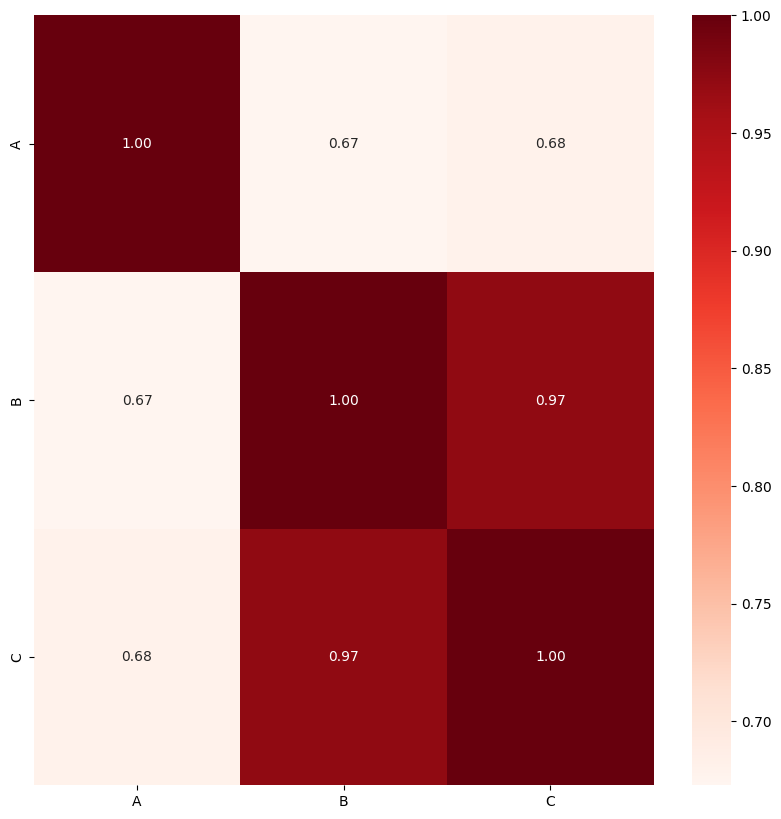

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
sns.heatmap(frame.corr(),
            annot = True,
            fmt=".2f",
            cmap='Reds')
plt.show()



# Unique Values, Value Counts, Membership

* 가장 많이 활용되는 함수 중 하나
* 검색하고자 하는 값(query)의 유무, 개수 등 파악시 활용

| Method         | Description                                                                                                             |
|----------------|-------------------------------------------------------------------------------------------------------------------------|
| `isin`         | Compute a Boolean array indicating whether each Series or DataFrame value is contained in the passed sequence of values |
| `unique`       | Compute an array of unique values in a Series, returned in the order observed                                           |
| `value_counts` | Return a Series containing unique values as its index and frequencies as its values, ordered count in descending order  |

In [55]:
frame = pd.DataFrame({"DY": ["A","B","A","C","D"], "KU": ["C","A","B","B","E"]})

print("Original")
display(frame)
print()

# 주로 column 별로 확인함
print("frame['DY'].value_counts()")
display(frame['DY'].value_counts())
print()

dy_value_counts = frame['DY'].value_counts().to_numpy()
print(f"dy_value_counts:{dy_value_counts}\n")


print("frame['KU'].unique()")
display(frame['KU'].unique())
print()

# 검색하고자 하는 값의 포함 유무 확인
display(frame.isin(["A"]))

Original


,DY,KU
0,A,C
1,B,A
2,A,B
3,C,B
4,D,E



frame['DY'].value_counts()


,count
DY,
A,2
B,1
C,1
D,1



dy_value_counts:[2 1 1 1]

frame['KU'].unique()


array(['C', 'A', 'B', 'E'], dtype=object)

,DY,KU
0,True,False
1,False,True
2,True,False
3,False,False
4,False,False
